In [2]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
base = pd.read_csv('../data/house_prices.csv')
base

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
base.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
base.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Convert 'date' column to datetime format
base['date'] = pd.to_datetime(base['date'], format='%Y%m%dT%H%M%S')

# Calculate the correlation
base.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.016800,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,...,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.016800,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,-0.034410,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,-0.034559,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.006313,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,-0.022491,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001356,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001800,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


<Axes: >

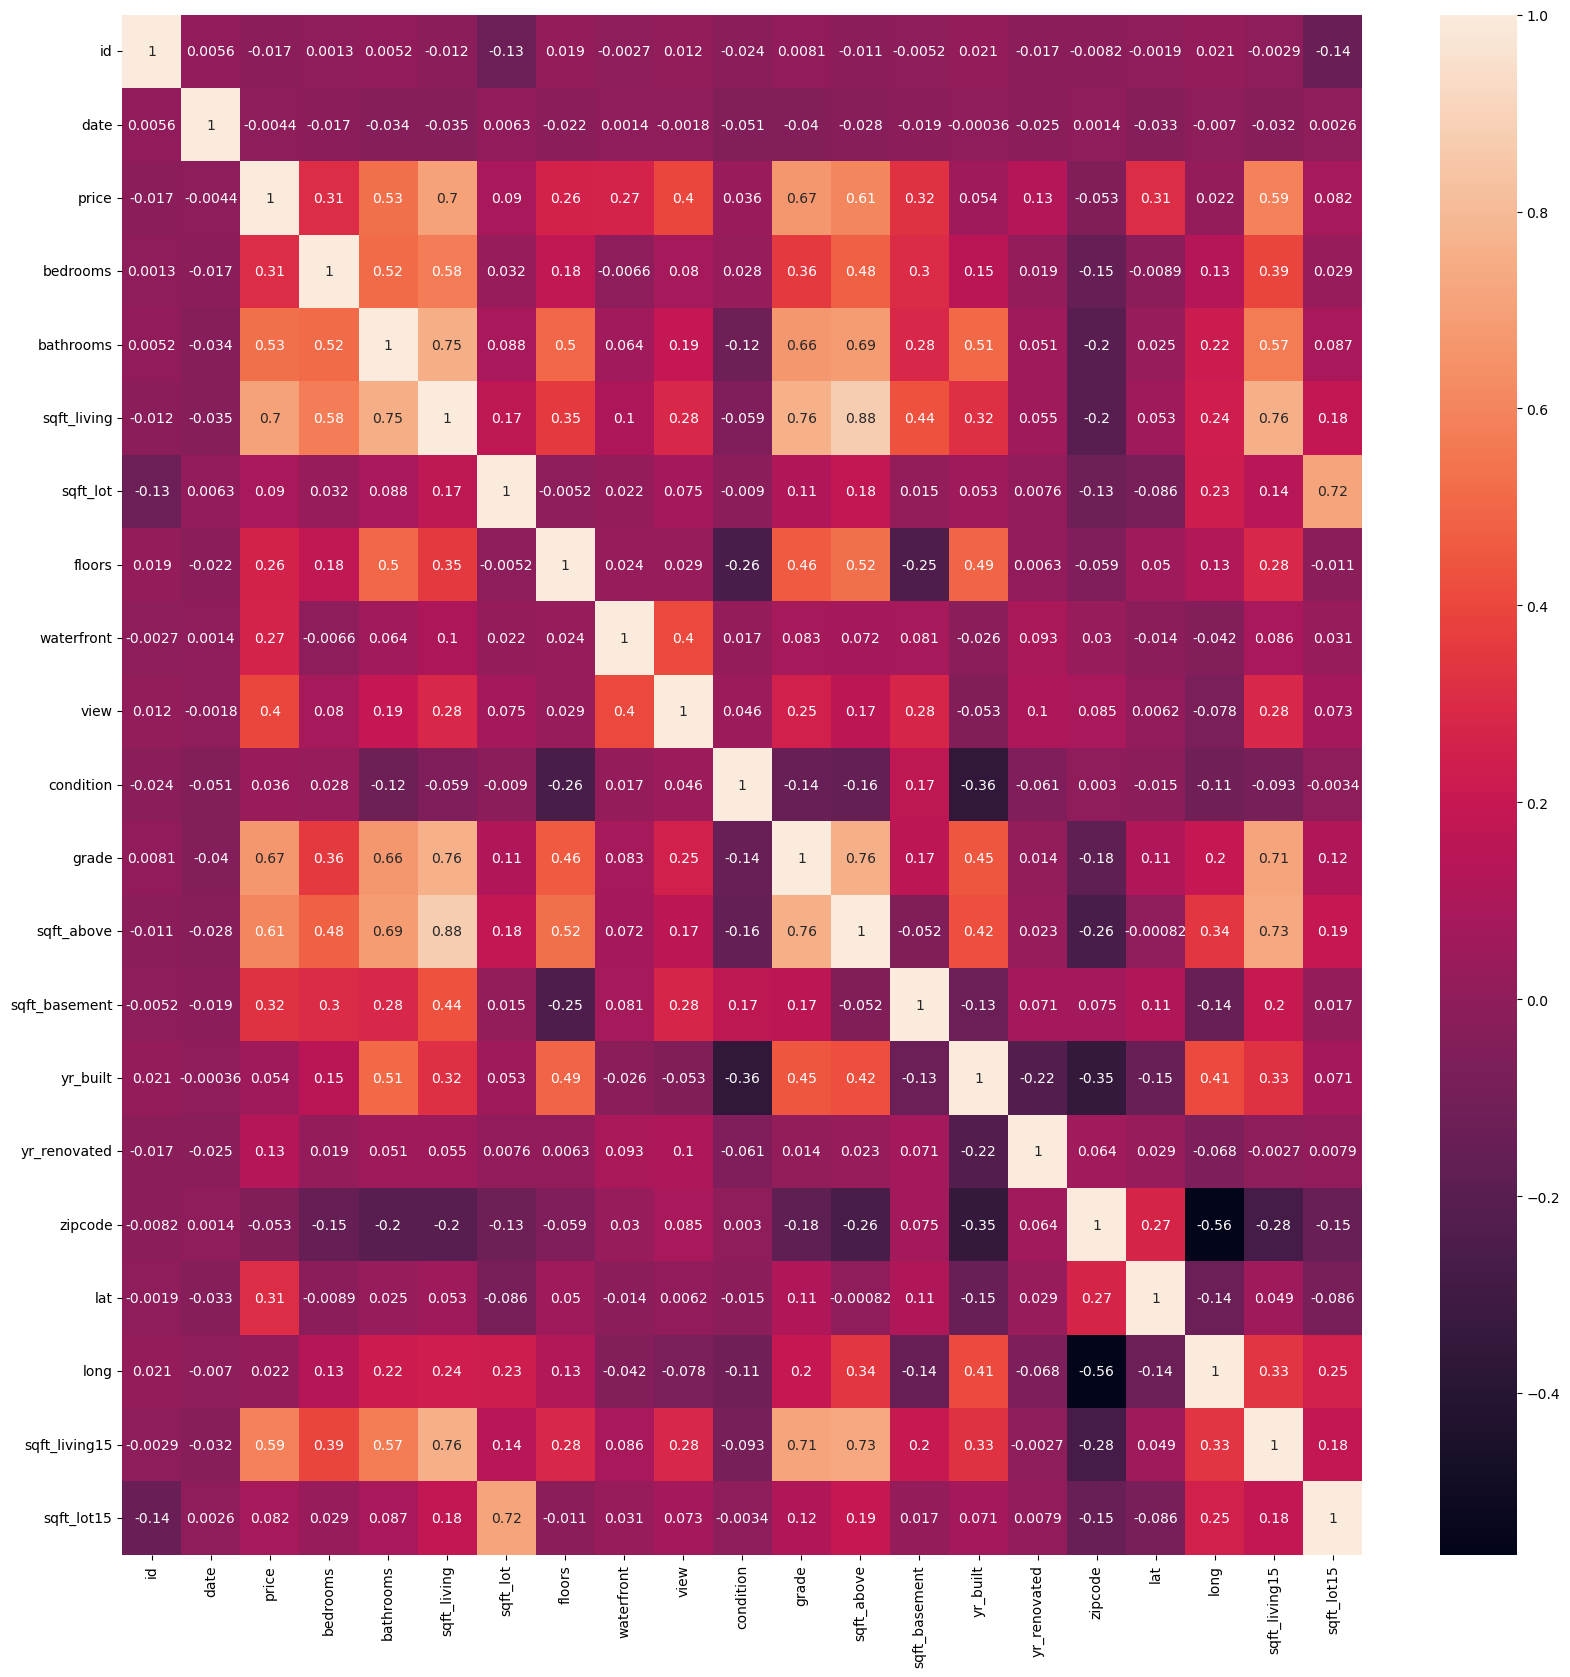

In [7]:
fig = plt.figure(figsize=(20, 20))
sns.heatmap(base.corr(), annot=True)

In [8]:
X = base.iloc[:, 5:6].values
y = base.iloc[:, 2].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15129, 1), (6484, 1), (15129,), (6484,))

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
# b0
regressor.intercept_

-37893.59850106668

In [13]:
# b1
regressor.coef_

array([278.32860644])

In [14]:
regressor.score(X_train, y_train)

0.49453356717789787

In [15]:
predictions = regressor.predict(X_train)
predictions

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [16]:
graphic = px.scatter(x=X_train.ravel(), y=predictions)
graphic.show()

In [17]:
graphic1 = px.scatter(x=X_train.ravel(), y=y_train)
graphic2 = px.line(x=X_train.ravel(), y=predictions)
graphic2.data[0].line.color = 'red'
graphic3 = go.Figure(data=graphic1.data + graphic2.data)
graphic3

In [18]:
test_predictions = regressor.predict(X_test)
test_predictions

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [19]:
abs(y_test - test_predictions).mean()

172604.1288999541

In [20]:
mean_absolute_error(y_test, test_predictions)

172604.1288999541

In [21]:
mean_squared_error(y_test, test_predictions)

70170013932.11592

In [22]:
np.sqrt(mean_squared_error(y_test, test_predictions))

264896.23238565685

In [23]:
graphic1 = px.scatter(x=X_test.ravel(), y=y_test)
graphic2 = px.line(x=X_test.ravel(), y=test_predictions)
graphic2.data[0].line.color = 'red'
graphic3 = go.Figure(data=graphic1.data + graphic2.data)
graphic3